## Advanced Lane Finding + Vehicle Detection Project

This project is a combination of Advanced Lane Finding and Vehicle Detection.



* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [1]:
import importlib
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roadlanes import draw_lane
import roadlanes
import adv_lane_lines
import searchlines
import perspectivetransform
import correctcamera
import object_detection_findmatches
from glob import glob
import object_detection_utils
import object_detection_colorspaces
import object_detection_fecvector
import object_detection_car_notcar

In [2]:
importlib.reload(adv_lane_lines)
importlib.reload(roadlanes)
importlib.reload(searchlines)
importlib.reload(perspectivetransform)
importlib.reload(correctcamera)

<module 'correctcamera' from 'C:\\Users\\rafal\\Documents\\GitHub\\Udacity-CarND\\CarND-Vehicle-Detection-master\\correctcamera.py'>

# Object Finding - using various methods

## This method uses historgrams of different colors to identify a pattern characteristic for an object

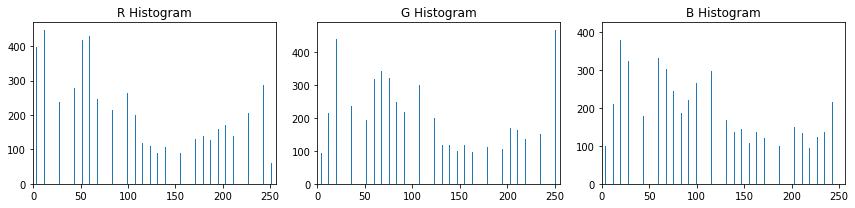

In [3]:
importlib.reload(object_detection_utils)
object_detection_utils.main_histogram()

## Using color spaces and clustering to discover objects

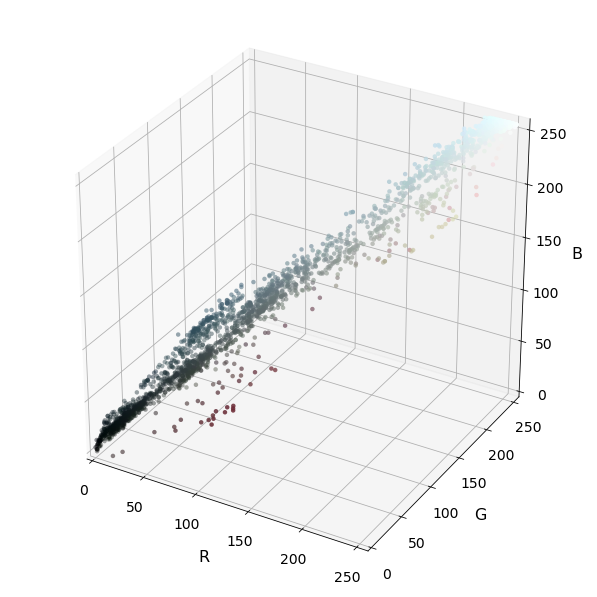

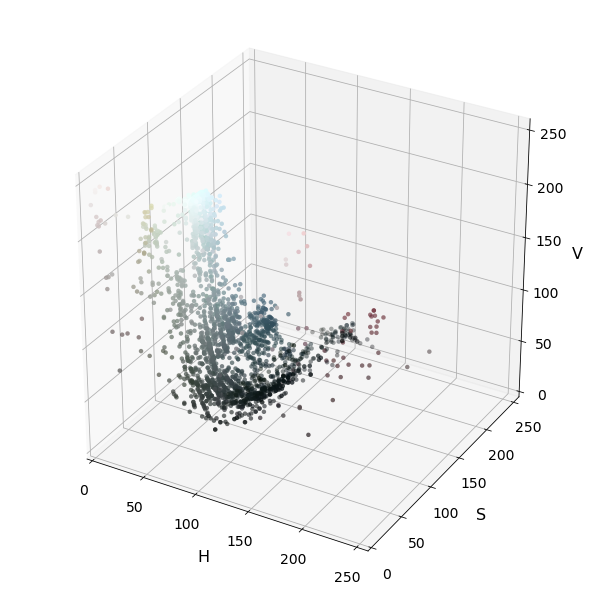

In [4]:
import object_detection_colorspaces
importlib.reload(object_detection_colorspaces)
object_detection_colorspaces.main_color_spaces()

## Object detection using template matching

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


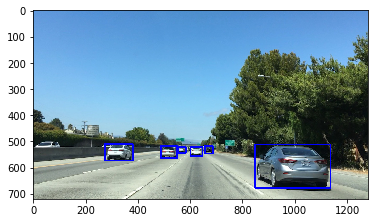

In [5]:
import object_detection_findmatches
importlib.reload(object_detection_findmatches)
object_detection_findmatches.main_drawboxes()

## using feature vector approach for pictures of lower resolution

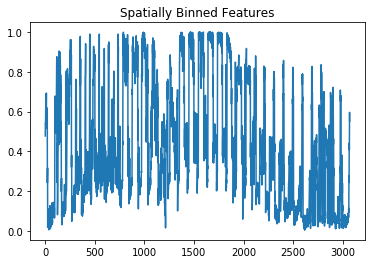

In [6]:
import object_detection_fecvector
importlib.reload(object_detection_fecvector)
object_detection_fecvector.main_fecvector()

## Image dataset analysis: cars vs. non-cars

util_images/vehicles_smallset\cars1\1.jpeg
Your function returned a count of 1196  cars and 1125  non-cars
of size:  (64, 64, 3)  and data type: uint8


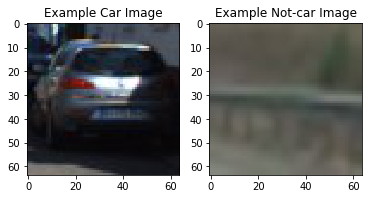

In [7]:
import object_detection_car_notcar
importlib.reload(object_detection_car_notcar)
object_detection_car_notcar.main_look_for_car()

In [8]:
import object_detection_hog_features

# Image data Exploration

# Let's see what kind of images we have for vehicles and non-vehicle objects

In [9]:
car_images = glob('util_images/vehicles/**/*.png')
noncar_images = glob('util_images/non-vehicles/**/*.png')

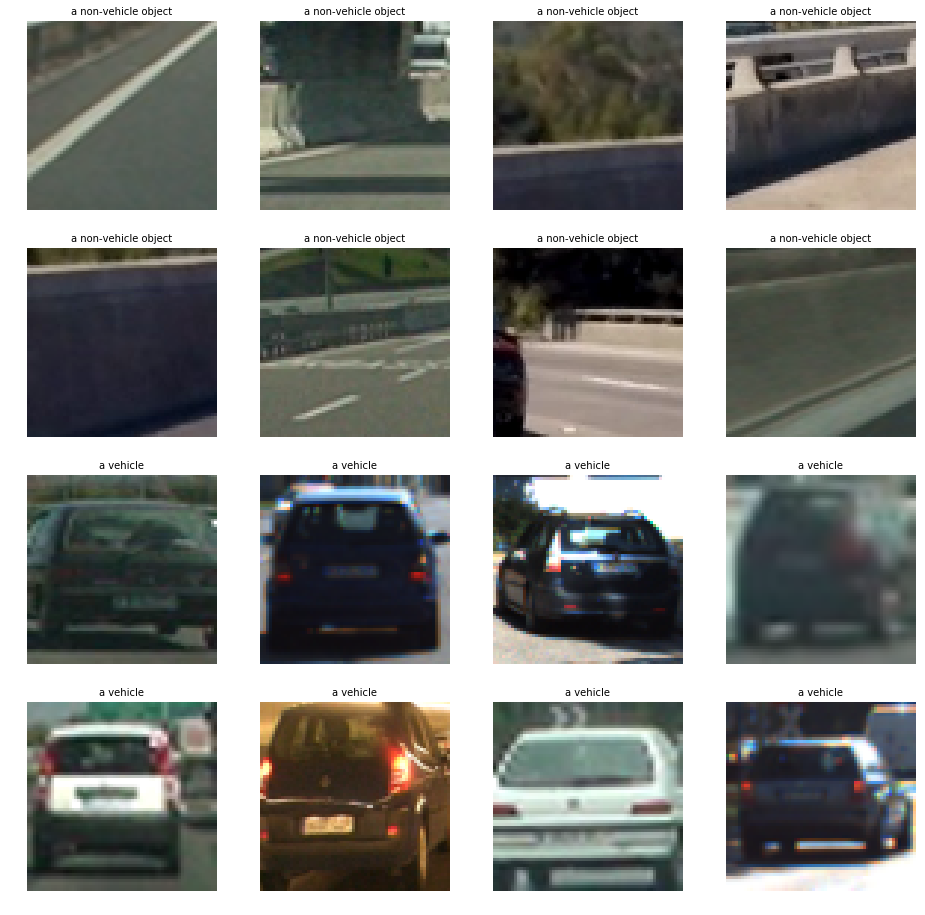

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
axs = axs.ravel()

for i in np.arange(8):
    img = cv2.imread(noncar_images[np.random.randint(0,len(noncar_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('a non-vehicle object', fontsize=10)
    axs[i].imshow(img)

for i in np.arange(8,16):
    img = cv2.imread(car_images[np.random.randint(0,len(car_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('a vehicle', fontsize=10)
    axs[i].imshow(img)
    


In [11]:
print("Number of vehicle images: {}".format(len(car_images)))
print("Number of non-vehicle images: {}".format(len(noncar_images)))

Number of vehicle images: 8792
Number of non-vehicle images: 8968


# Exploring various models and choose the best one

## Calculation of models...

In [12]:
import object_detection_hog_features
importlib.reload(object_detection_hog_features)
experiments_dict = object_detection_hog_features.main_hog()

Color Space: YCrCb , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: ALL, Orient: 8, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: ALL, Orient: 9, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: ALL, Orient: 9, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: ALL, Orient: 10, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: ALL, Orient: 10, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: ALL, Orient: 11, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: ALL, Orient: 11, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: HSV   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: HSV   , Hog Channel: ALL, Orient: 8, Pix per Cell: 16, Cell per Block: 2: calculation
Color 

## Displaying results of calculations for various models...

In [13]:
importlib.reload(object_detection_hog_features)
object_detection_hog_features.print_results(experiments_dict)

CS means Color Space
Or means Orientation
C/B means Cells per Block
P/C means Pixels per Cell


| CS:YCrCb	| Or:08	| C/B:2	| P/C:08	| Acc 1.0000	| F:007872	|
| CS:YCrCb	| Or:08	| C/B:2	| P/C:16	| Acc 0.9750	| F:004032	|
| CS:YCrCb	| Or:09	| C/B:2	| P/C:08	| Acc 1.0000	| F:008460	|
| CS:YCrCb	| Or:09	| C/B:2	| P/C:16	| Acc 1.0000	| F:004140	|
| CS:YCrCb	| Or:10	| C/B:2	| P/C:08	| Acc 1.0000	| F:009048	|
| CS:YCrCb	| Or:10	| C/B:2	| P/C:16	| Acc 1.0000	| F:004248	|
| CS:YCrCb	| Or:11	| C/B:2	| P/C:08	| Acc 1.0000	| F:009636	|
| CS:YCrCb	| Or:11	| C/B:2	| P/C:16	| Acc 0.9750	| F:004356	|
| CS:HSV	| Or:08	| C/B:2	| P/C:08	| Acc 1.0000	| F:007872	|
| CS:HSV	| Or:08	| C/B:2	| P/C:16	| Acc 0.9750	| F:004032	|
| CS:HSV	| Or:09	| C/B:2	| P/C:08	| Acc 1.0000	| F:008460	|
| CS:HSV	| Or:09	| C/B:2	| P/C:16	| Acc 1.0000	| F:004140	|
| CS:HSV	| Or:10	| C/B:2	| P/C:08	| Acc 1.0000	| F:009048	|
| CS:HSV	| Or:10	| C/B:2	| P/C:16	| Acc 1.0000	| F:004248	|
| CS:HSV	| Or:11	| C/B:2	| P/C:08	| Acc 1.0000	|

## Getting results better than specified accuracy

In [14]:
# getting models with accuacy 0.99 or higher
importlib.reload(object_detection_hog_features)
results_best_models = object_detection_hog_features.get_models(experiments_dict, accuracy=0.991)
results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="HLS")
object_detection_hog_features.print_results({"best_model": results_best_model})

CS means Color Space
Or means Orientation
C/B means Cells per Block
P/C means Pixels per Cell


| CS:HLS	| Or:08	| C/B:2	| P/C:08	| Acc 1.0000	| F:007872	|


# Extracing HOG (Histogram of Oriented Gradients) features for 2 examples

Text(0.5,1,'Non-Car HOG')

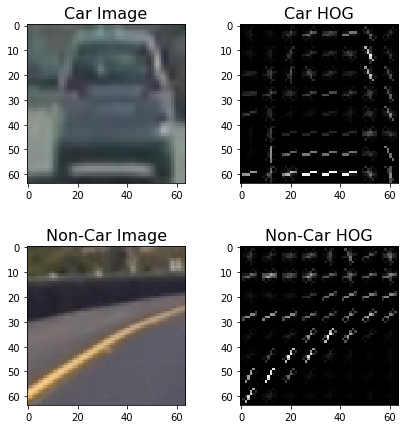

In [15]:
car_img = mpimg.imread(car_images[5])
_, car_dst = object_detection_utils.get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
noncar_img = mpimg.imread(noncar_images[5])
_, noncar_dst = object_detection_utils.get_hog_features(noncar_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

# Visualize 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=16)
ax2.imshow(car_dst, cmap='gray')
ax2.set_title('Car HOG', fontsize=16)
ax3.imshow(noncar_img)
ax3.set_title('Non-Car Image', fontsize=16)
ax4.imshow(noncar_dst, cmap='gray')
ax4.set_title('Non-Car HOG', fontsize=16)

## Sliding windows algorithm - used when analyzing an image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


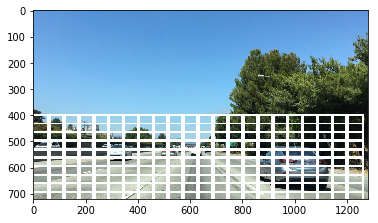

In [16]:
import object_detection_sliding_window
import object_detection_utils
importlib.reload(object_detection_utils)
importlib.reload(object_detection_sliding_window)
object_detection_sliding_window.sliding_window_main()

## the best HLS model

Color Space: HLS   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Number of rectangles: 7
Number of rectangles: 3
Number of rectangles: 2


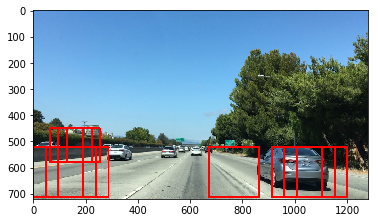

In [17]:
import object_detection_hog_features
import object_detection_hog_subsampling
importlib.reload(object_detection_utils)
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_hog_subsampling)

results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="HLS")
object_detection_hog_subsampling.main_hog_subsampling(results_best_model, img_file="util_images/bbox-example-image.png")

## the best YUV model

Color Space: YUV   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Number of rectangles: 11
Number of rectangles: 30
Number of rectangles: 57


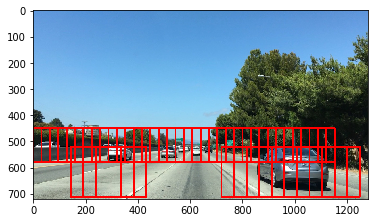

In [18]:
import object_detection_hog_features
import object_detection_hog_subsampling
importlib.reload(object_detection_utils)
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_hog_subsampling)

results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="YUV")
object_detection_hog_subsampling.main_hog_subsampling(results_best_model, img_file="util_images/bbox-example-image.png")

## the best HSV model

Color Space: HSV   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Number of rectangles: 19
Number of rectangles: 3
Number of rectangles: 9


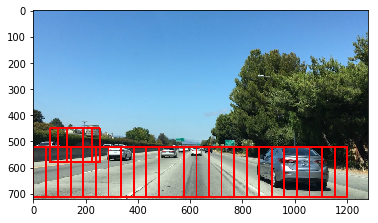

In [19]:
import object_detection_hog_features
import object_detection_hog_subsampling
importlib.reload(object_detection_utils)
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_hog_subsampling)

results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="HSV")
object_detection_hog_subsampling.main_hog_subsampling(results_best_model, img_file="util_images/bbox-example-image.png")

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
0.68 Seconds to train SVC...
Test Accuracy of SVC =  0.9675


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


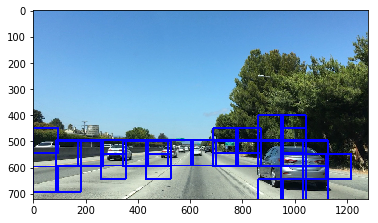

In [20]:
import importlib
import object_detection_search_and_classify
importlib.reload(object_detection_search_and_classify)
object_detection_search_and_classify.main_search_and_classify()